In [4]:
# 📦 필수 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import platform

# 시스템이 Windows인지 확인
if platform.system() == 'Windows':
    # 기본 한글 폰트 설정 (예: 'Malgun Gothic')
    plt.rc('font', family='Malgun Gothic')
else:
    # macOS 또는 Linux일 경우 예외 처리 (필요 시 다른 폰트 설정)
    plt.rc('font', family='AppleGothic')  # mac용
    # Linux는 별도로 설치 필요할 수 있음

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


## 전체 데이터 EDA

In [5]:
# 📂 데이터 불러오기
df = pd.read_csv('../../1_preprocessing/JY/preprocessed_data.csv', dtype={'stock_code':str, 'year':str})

✅ 데이터 shape: (21908, 28)

📋 컬럼 목록:
 ['corp_nm', 'stock_code', 'year', '자산총계', '비유동자산', '유동자산', '자본총계', '자본금', '이익잉여금', '부채총계', '비유동부채', '유동부채', '현금및현금성자산', '영업활동현금흐름', '투자활동현금흐름', '재무활동현금흐름', '기초현금및현금성자산', '기말현금및현금성자산', '매출액', '매출총이익', '판매관리비', '영업이익', '매출원가', '당기순이익', '재고자산', '매출채권', '매출채권및기타유동채권', 'is_defaulted']

❓ 결측치 현황:
 corp_nm         0
stock_code      0
year            0
자산총계            0
비유동자산           0
유동자산            0
자본총계            0
자본금             0
이익잉여금           0
부채총계            0
비유동부채           0
유동부채            0
현금및현금성자산        0
영업활동현금흐름        0
투자활동현금흐름        0
재무활동현금흐름        0
기초현금및현금성자산      0
기말현금및현금성자산      0
매출액             0
매출총이익           0
판매관리비           0
영업이익            0
매출원가            0
당기순이익           0
재고자산            0
매출채권            0
매출채권및기타유동채권     0
is_defaulted    0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
자산총계,21908.0,7.521830e+08,2.893178e+09,7.493152e+06,65404958.25,136357947.0,3.479638e+08,2.884802e+10
비유동자산,21908.0,4.998011e+08,2.129587e+09,1.223691e+06,28502804.25,69786220.5,1.926248e+08,2.170757e+10
유동자산,21908.0,2.523580e+08,8.847299e+08,2.224240e+06,27516988.75,58567458.5,1.353697e+08,8.602837e+09
자본총계,21908.0,4.083521e+08,1.513486e+09,-1.968966e+07,38906272.50,83231901.5,2.042510e+08,1.550553e+10
자본금,21908.0,3.589459e+07,1.202490e+08,2.503000e+05,5000000.00,9432265.5,2.163841e+07,1.226320e+09
이익잉여금,21908.0,2.448328e+08,1.085175e+09,-4.296067e+08,678492.00,33015460.5,1.155797e+08,1.130945e+10
부채총계,21908.0,3.317646e+08,1.407712e+09,1.132509e+06,17825454.75,44429047.5,1.273942e+08,1.449670e+10
비유동부채,21908.0,1.199719e+08,5.841028e+08,0.000000e+00,1887675.00,7667287.0,2.812622e+07,6.212960e+09
유동부채,21908.0,2.002083e+08,7.603892e+08,4.838400e+05,12358162.75,33773406.0,9.572195e+07,7.332356e+09
현금및현금성자산,21908.0,4.102584e+07,1.348360e+08,2.164500e+04,3357204.50,9074903.0,2.507705e+07,1.314669e+09


c:\Users\tktk5\Downloads\RiskRadar\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


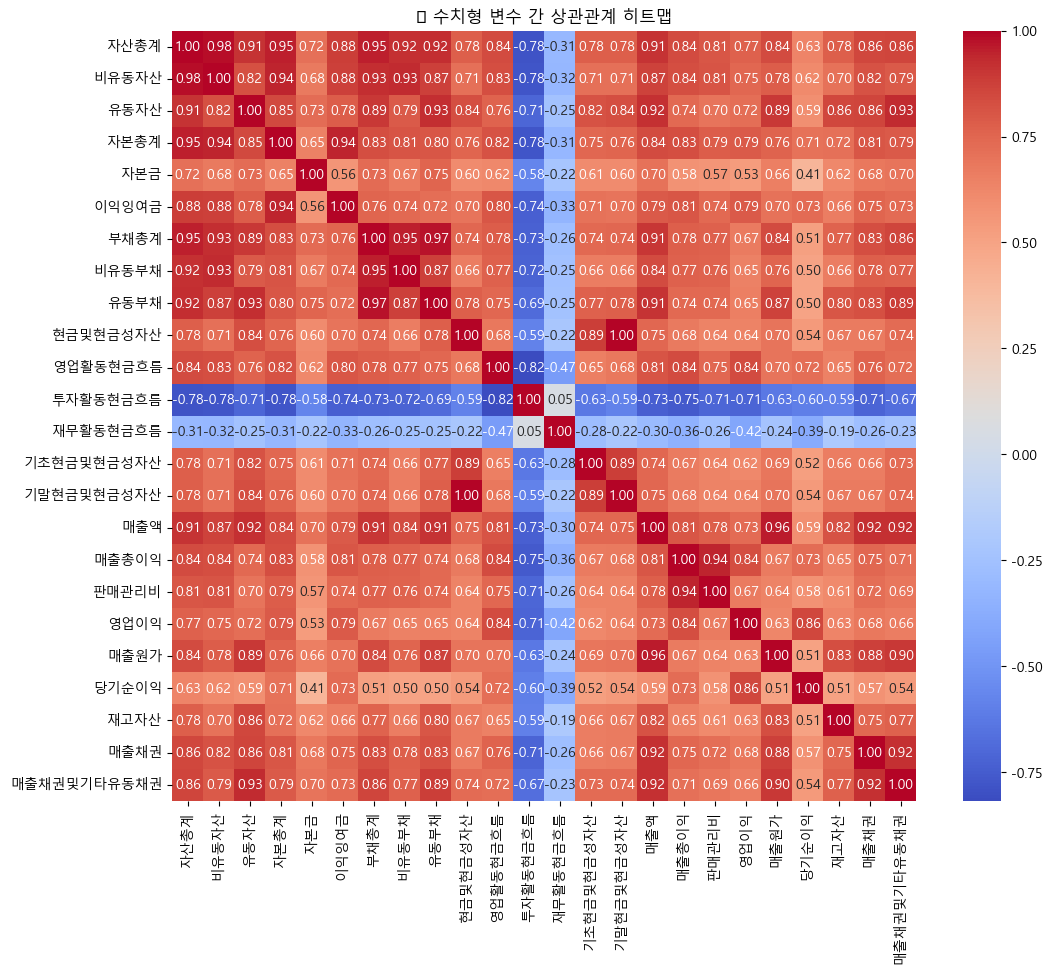

C:\Users\tktk5\AppData\Local\Temp\ipykernel_3676\1446762721.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm', orient='h')


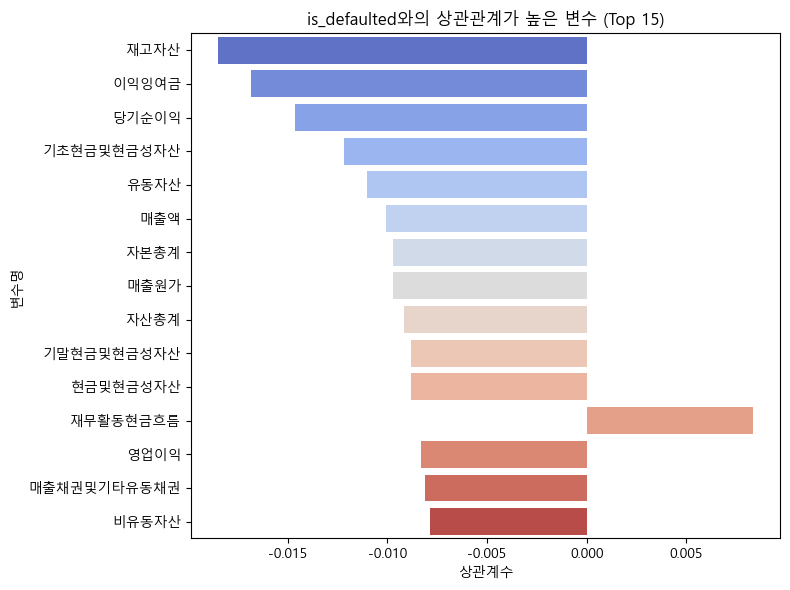

C:\Users\tktk5\AppData\Local\Temp\ipykernel_3676\1446762721.py:48: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\tktk5\Downloads\RiskRadar\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


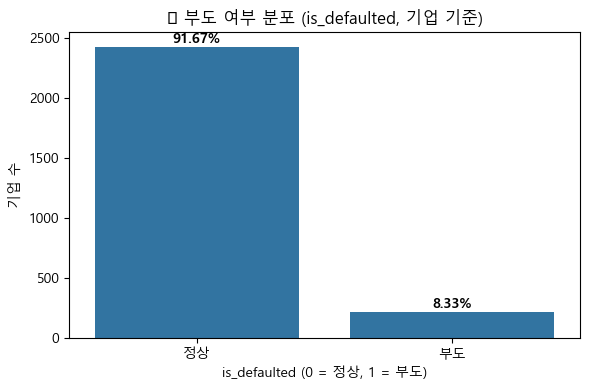

In [14]:
# 📌 기본 정보
print("✅ 데이터 shape:", df.shape)
print("\n📋 컬럼 목록:\n", df.columns.tolist())
print("\n❓ 결측치 현황:\n", df.isnull().sum())

# ⚙️ 수치형 컬럼 추출 (is_defaulted 제외)
numeric_cols = df.select_dtypes(include=np.number).columns.drop("is_defaulted")

# 📊 기초 통계 요약
display(df[numeric_cols].describe().T)

# 🔗 상관관계 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("🔗 수치형 변수 간 상관관계 히트맵")
plt.show()

# 🎯 is_defaulted와의 상관계수 Top 15 시각화
correlations = df[numeric_cols].corrwith(df['is_defaulted']).sort_values(key=lambda x: abs(x), ascending=False)
top_corr = correlations.iloc[:15]

plt.figure(figsize=(8, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm', orient='h')
plt.title('is_defaulted와의 상관관계가 높은 변수 (Top 15)')
plt.xlabel('상관계수')
plt.ylabel('변수명')
plt.tight_layout()
plt.show()

# 📊 Annotated Bar Plot: is_defaulted 분포
# 회사별로 is_defaulted가 1인 경우가 있으면 1, 아니면 0
company_df = df.groupby('corp_nm')['is_defaulted'].max().reset_index()

count_series = company_df['is_defaulted'].value_counts()
percent_series = company_df['is_defaulted'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=count_series.index, y=count_series.values)
plt.title("📉 부도 여부 분포 (is_defaulted, 기업 기준)")
plt.xlabel("is_defaulted (0 = 정상, 1 = 부도)")
plt.ylabel("기업 수")
plt.xticks([0, 1], ['정상', '부도'])

for i, val in enumerate(count_series.values):
    percent = percent_series[i]
    ax.text(i, val + 5, f'{percent:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


## VIF

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 다중공선성 확인을 위한 VIF 계산
X = df[numeric_cols]
# X = X.dropna()  # 결측치 제거

vif_data = pd.DataFrame()
vif_data['변수명'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values('VIF', ascending=False))

            변수명            VIF
14   기말현금및현금성자산  577062.223687
9      현금및현금성자산  577057.300365
0          자산총계     477.265065
1         비유동자산     305.812089
6          부채총계     167.027726
2          유동자산      80.540108
8          유동부채      68.425951
15          매출액      58.441586
3          자본총계      57.884598
16        매출총이익      36.096678
7         비유동부채      33.924059
19         매출원가      29.156501
17        판매관리비      22.085357
23  매출채권및기타유동채권      16.684332
10     영업활동현금흐름      12.747031
5         이익잉여금      12.190732
18         영업이익      10.783729
22         매출채권      10.764535
11     투자활동현금흐름       8.876751
13   기초현금및현금성자산       7.851239
21         재고자산       5.341524
20        당기순이익       4.744847
12     재무활동현금흐름       3.228782
4           자본금       2.765239


## 정상 vs 부도

### 1. Histogram + Box + Violin Plot

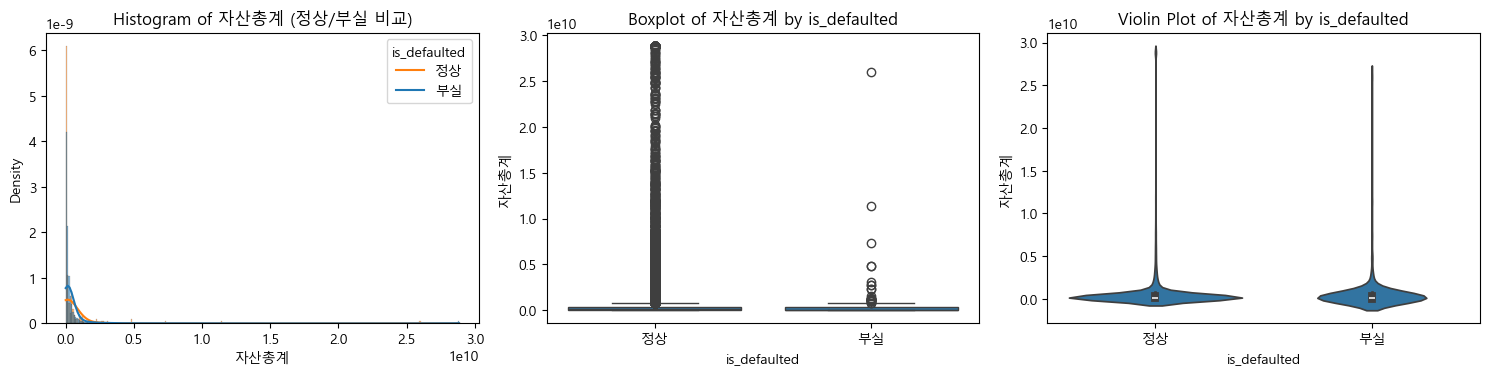

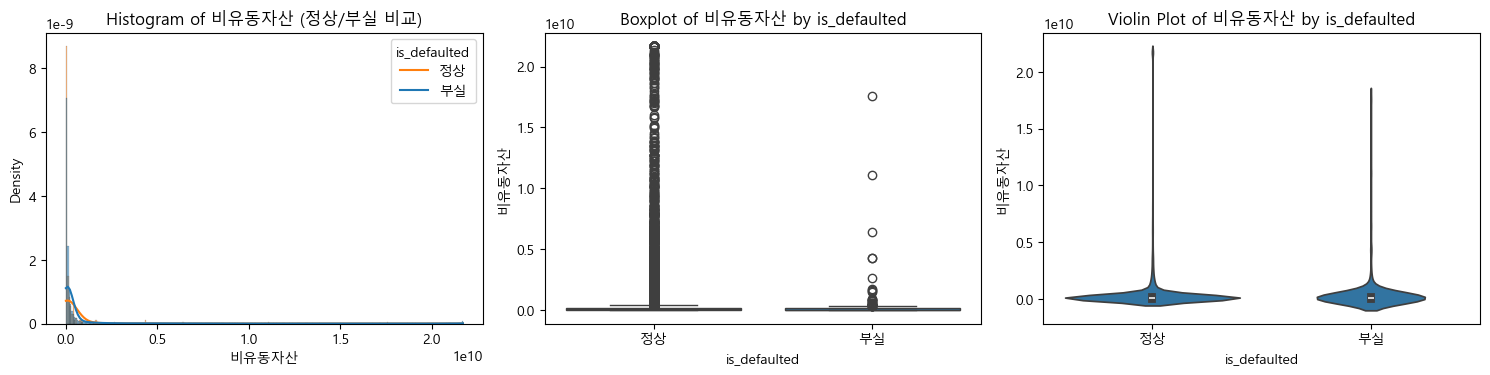

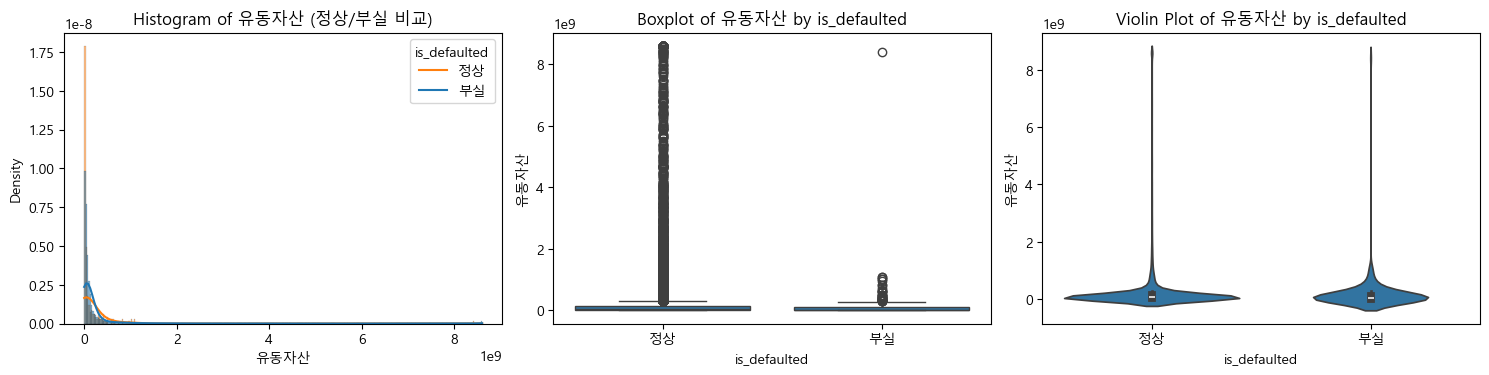

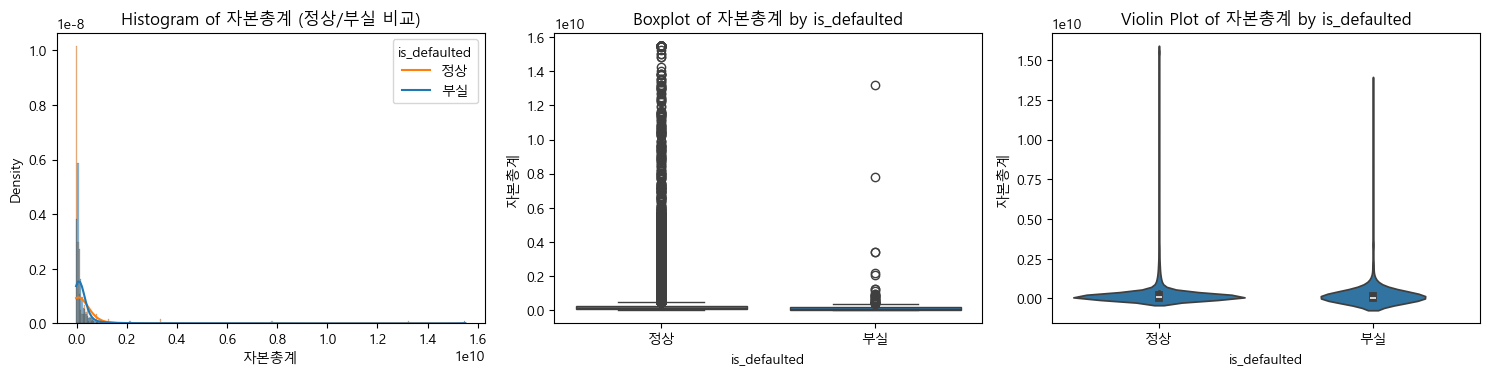

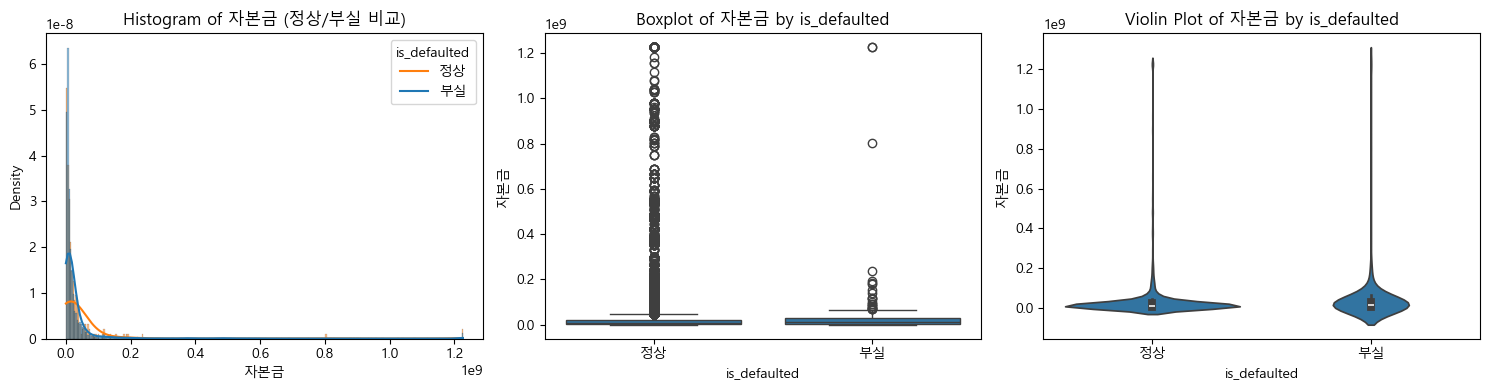

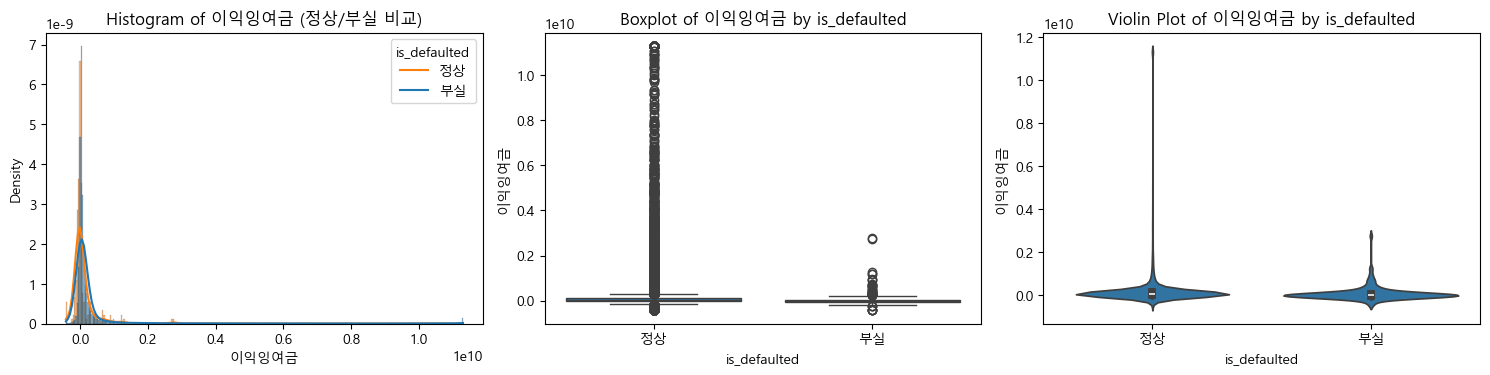

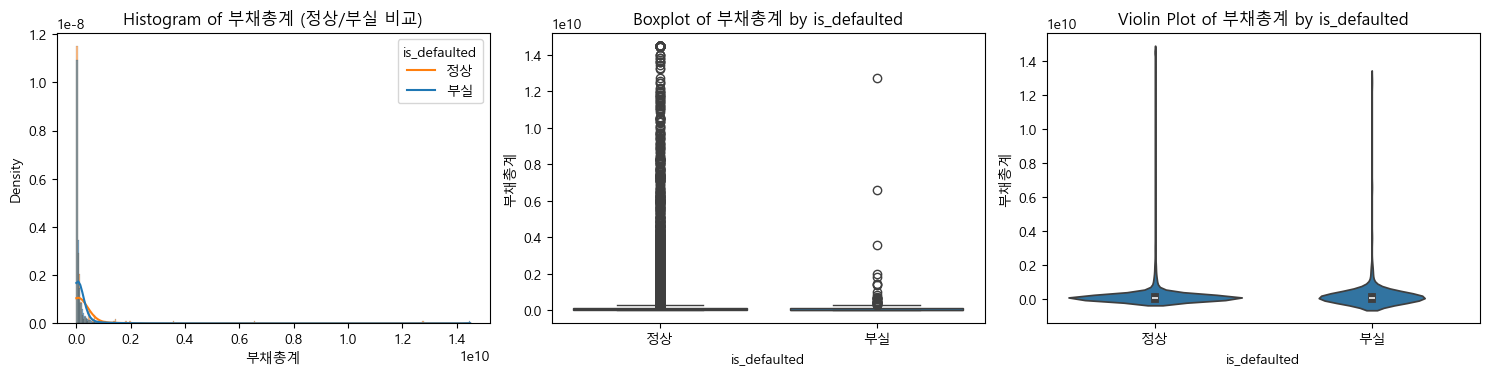

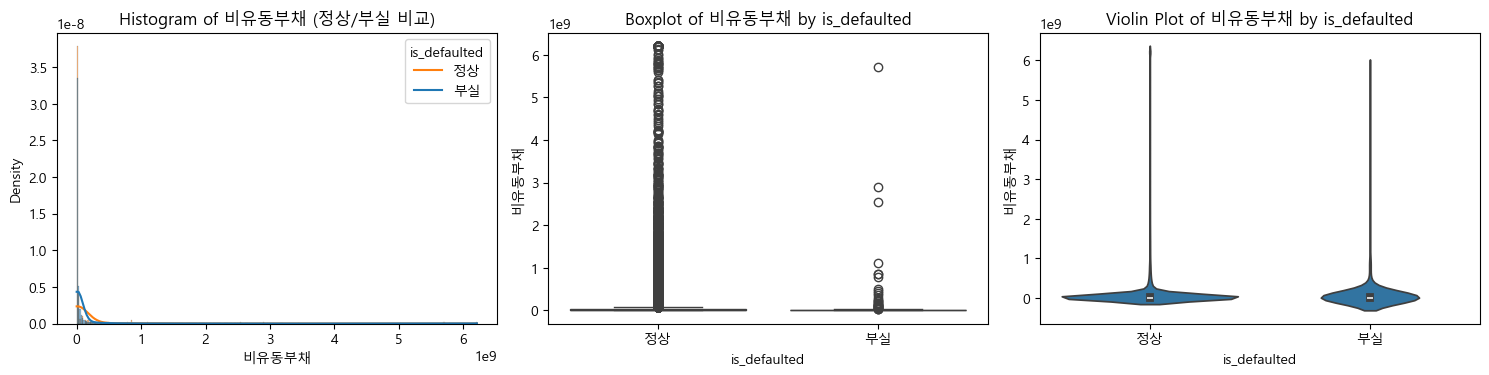

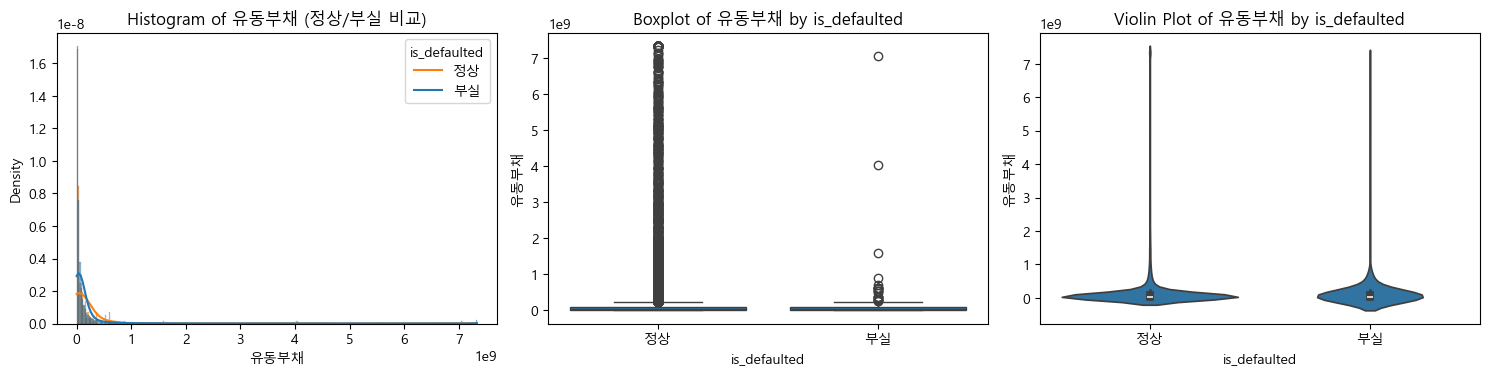

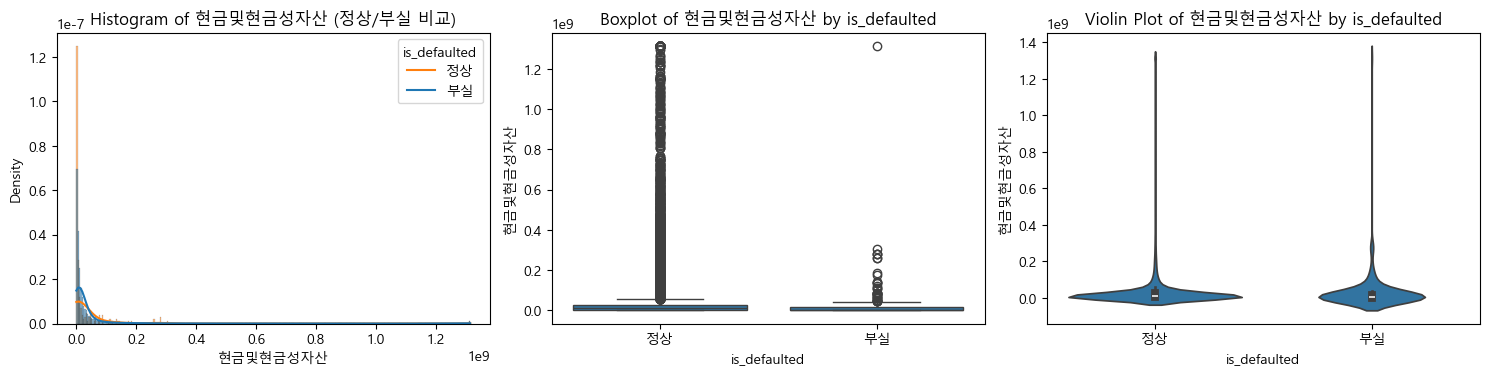

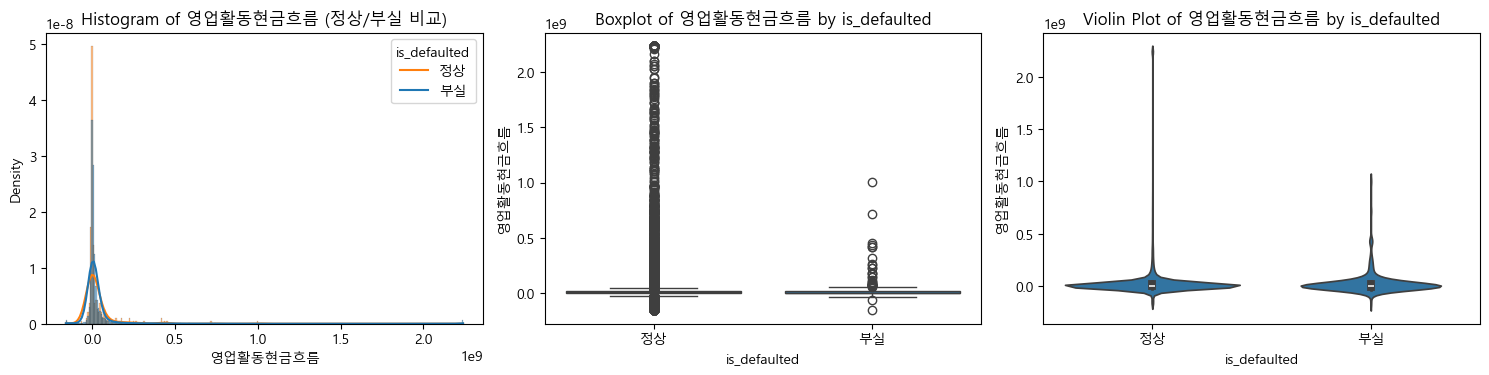

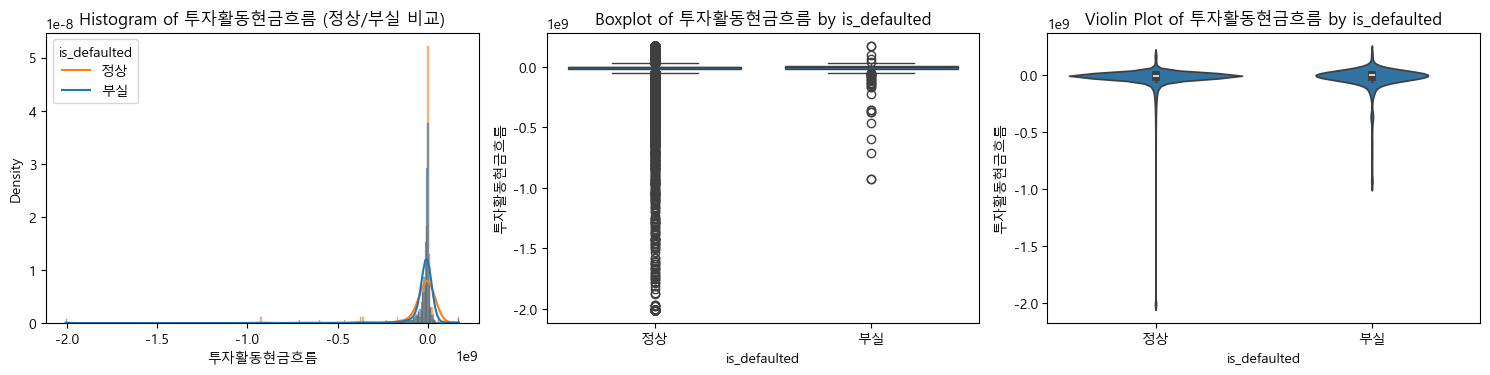

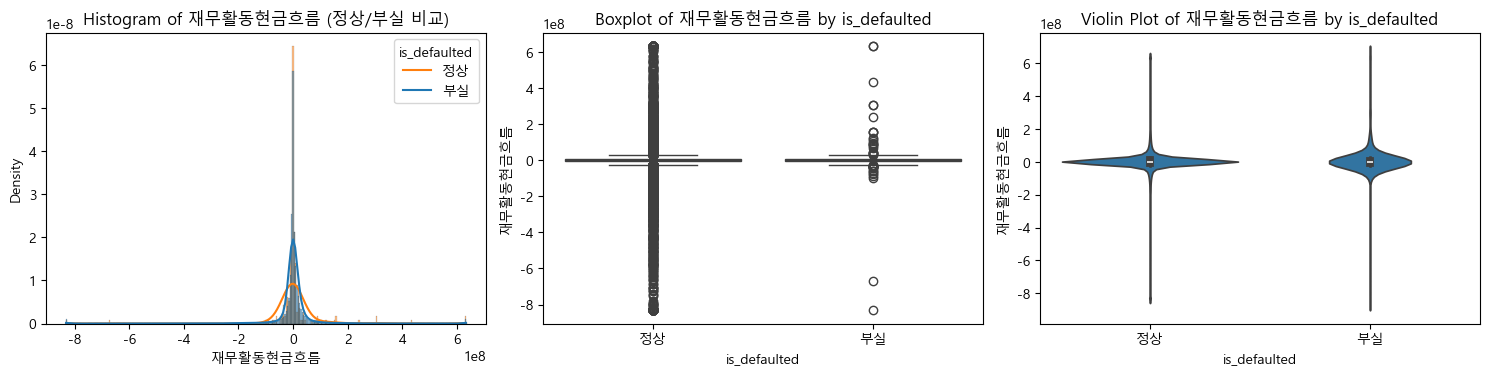

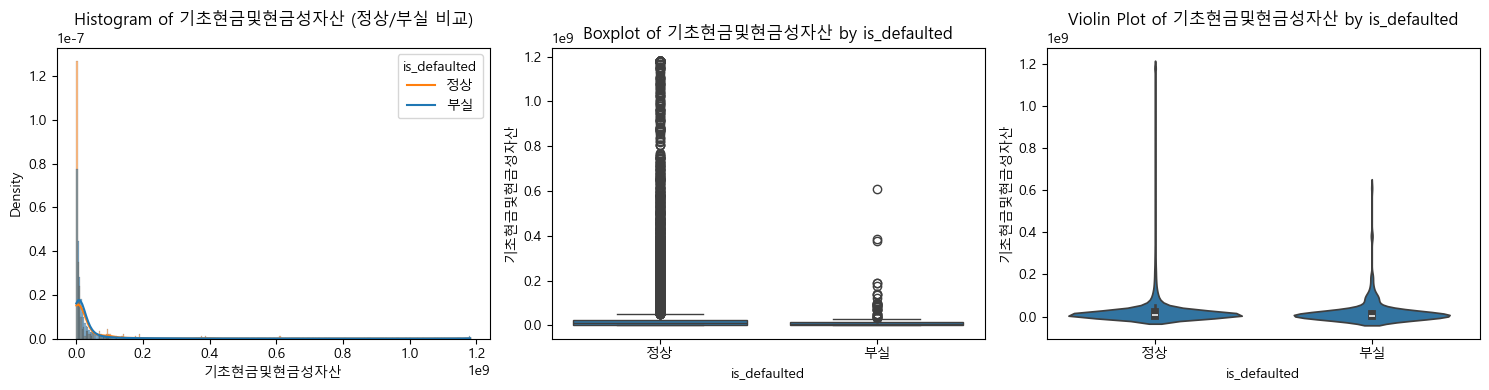

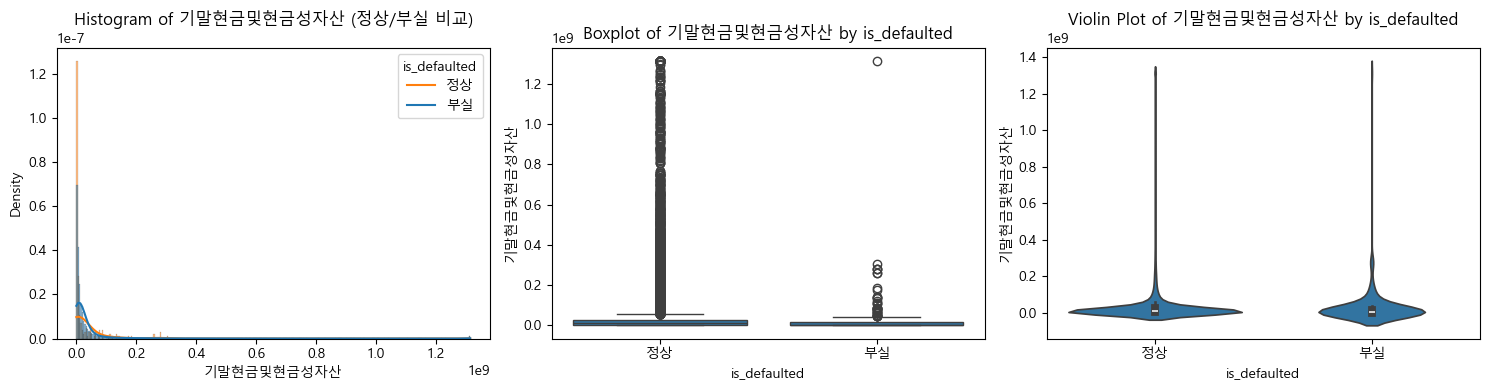

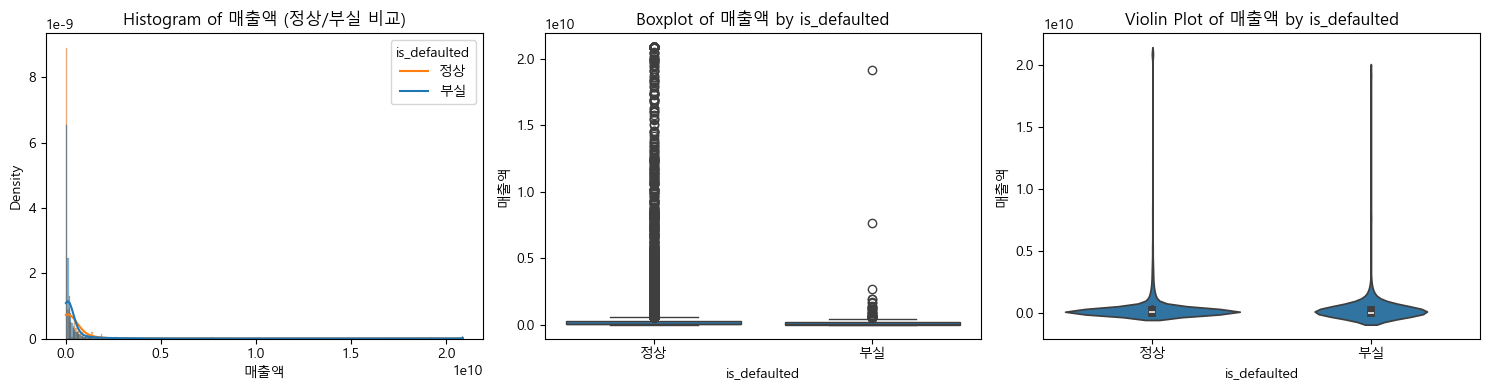

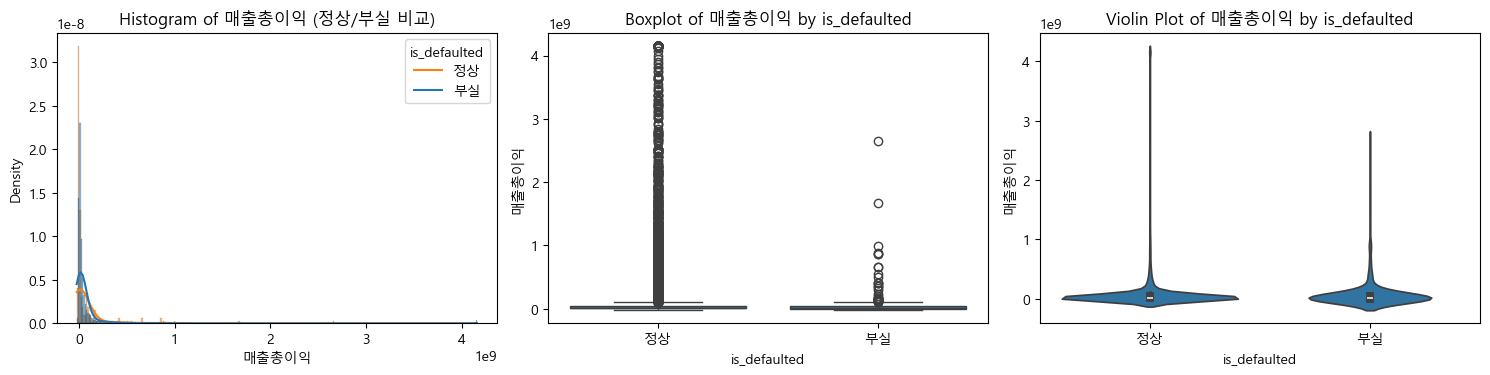

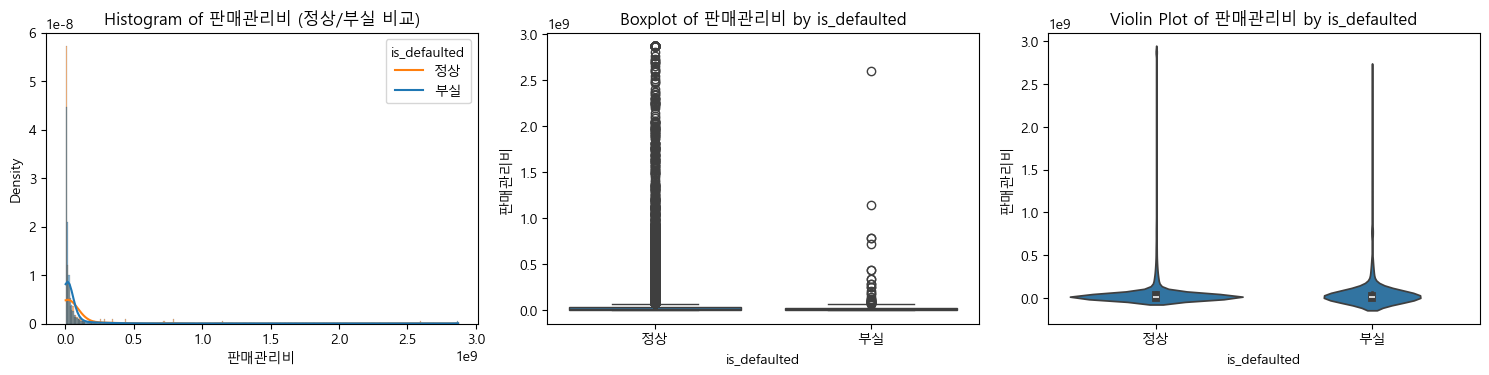

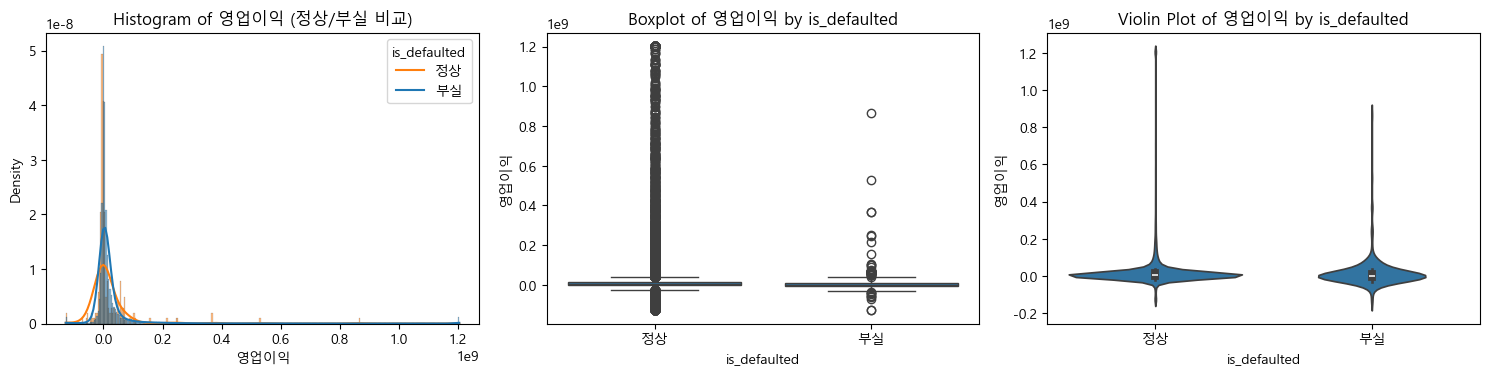

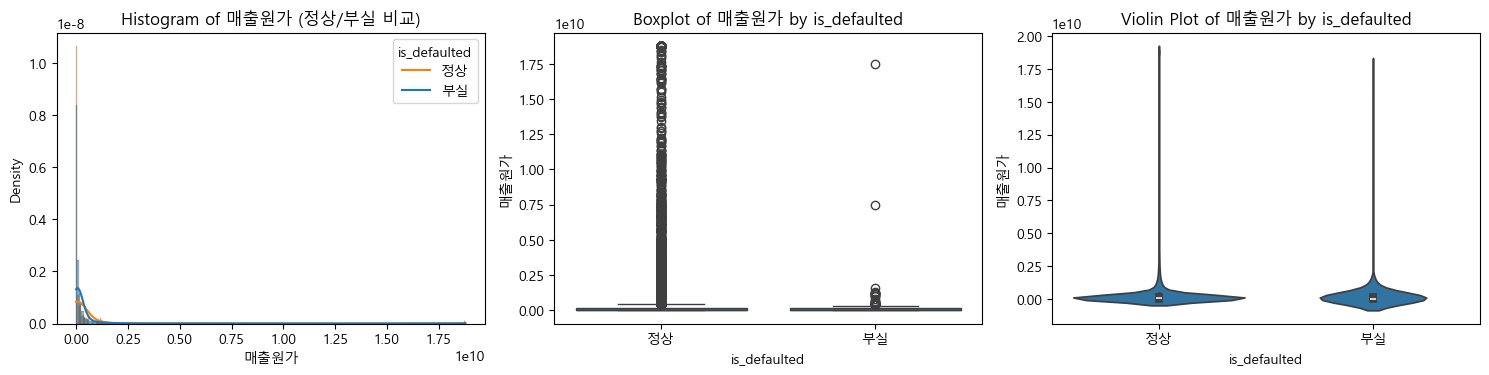

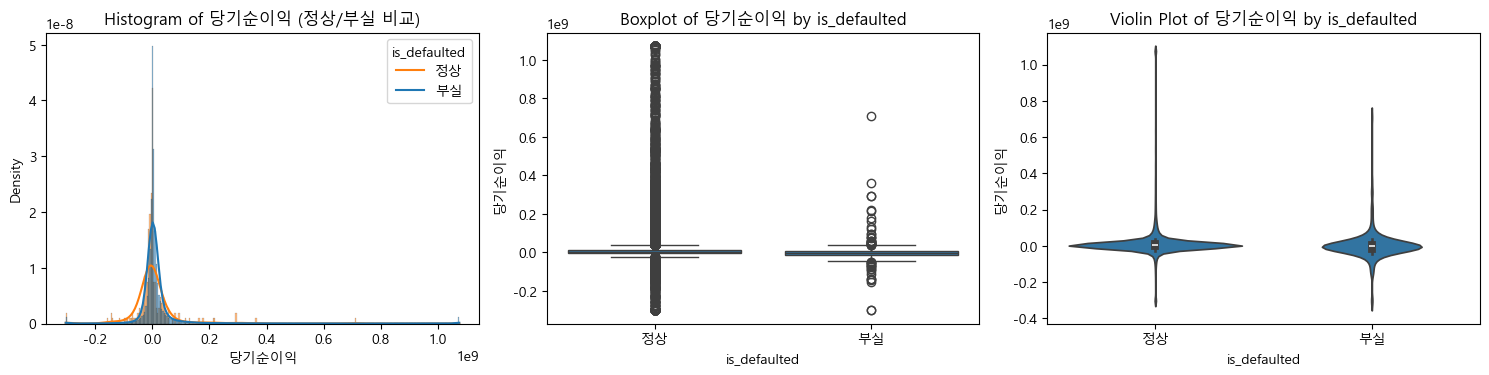

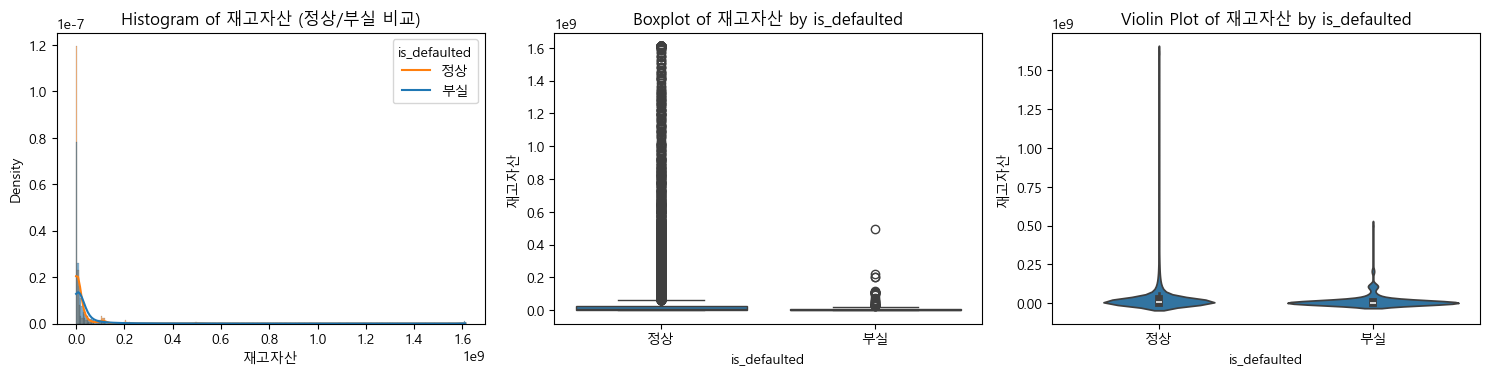

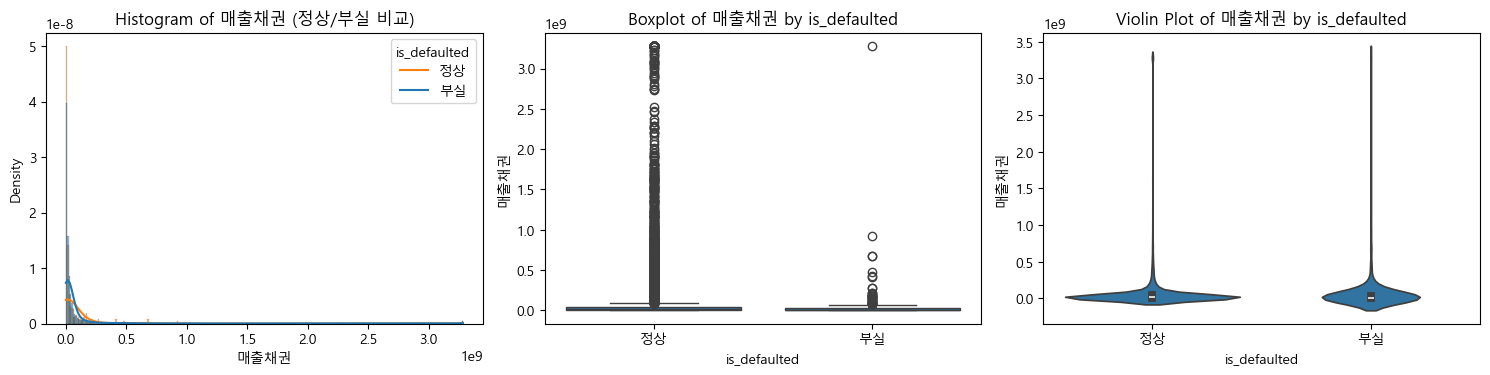

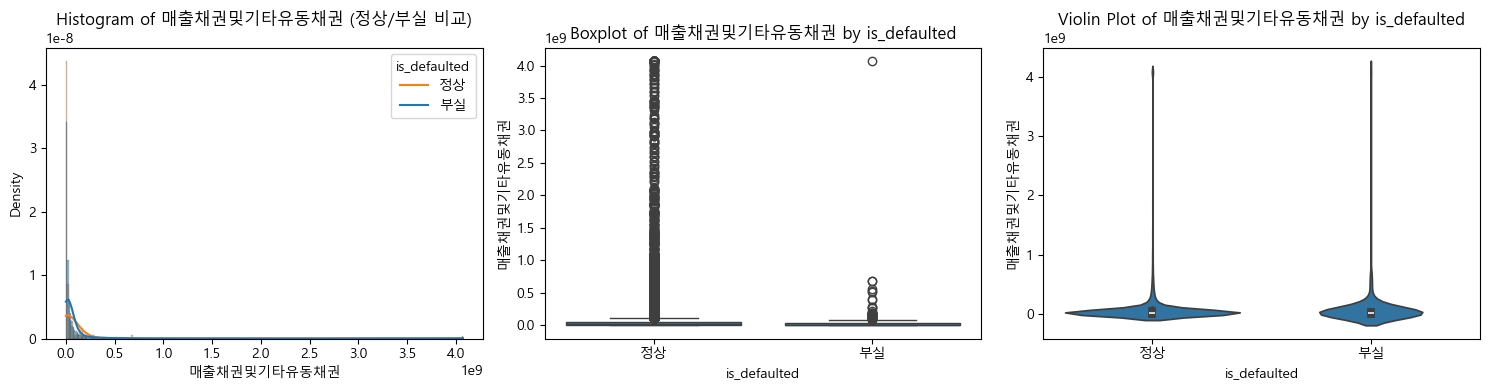

In [7]:
columns = df.select_dtypes(include=np.number).columns.drop("is_defaulted")
for col in columns:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # 1. 정상/부실 전체 합산 히스토그램
    sns.histplot(data=df, x=col, hue=df['is_defaulted'], kde=True, stat='density', common_norm=False, ax=axes[0])
    axes[0].set_title(f'Histogram of {col} (정상/부실 비교)')
    axes[0].set_xlabel(col)
    axes[0].legend(title='is_defaulted', labels=['정상', '부실'])

    # 2. 정상/부실 그룹별 Boxplot
    sns.boxplot(x=df['is_defaulted'], y=df[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col} by is_defaulted')
    axes[1].set_xlabel('is_defaulted')
    axes[1].set_xticks([0, 1])
    axes[1].set_xticklabels(['정상', '부실'])

    # 3. 정상/부실 그룹별 Violinplot
    sns.violinplot(x=df['is_defaulted'], y=df[col], ax=axes[2])
    axes[2].set_title(f'Violin Plot of {col} by is_defaulted')
    axes[2].set_xlabel('is_defaulted')
    axes[2].set_xticks([0, 1])
    axes[2].set_xticklabels(['정상', '부실'])

    plt.tight_layout()
    plt.show()      

### 2. Q-Q Plot (정규성 검정)

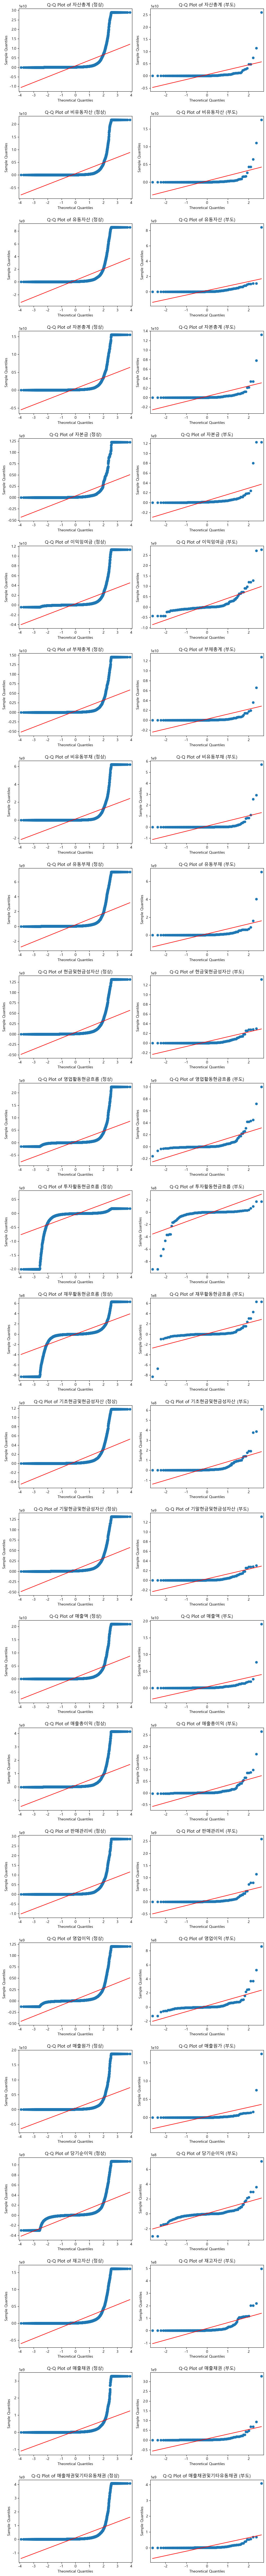

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

n_cols = 2  # 정상, 부도
n_rows = len(columns)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows))

for i, col in enumerate(columns):
    # 정상 그룹
    sm.qqplot(df.loc[df['is_defaulted'] == 0, col].dropna(), line='s', ax=axes[i, 0])
    axes[i, 0].set_title(f"Q-Q Plot of {col} (정상)")
    # 부도 그룹
    sm.qqplot(df.loc[df['is_defaulted'] == 1, col].dropna(), line='s', ax=axes[i, 1])
    axes[i, 1].set_title(f"Q-Q Plot of {col} (부도)")

    plt.tight_layout()
    plt.show()